In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
data=pd.read_csv('train_ctrUa4K (1).csv')

In [242]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [244]:
data.shape

(614, 13)

In [245]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [246]:
cols=data[["Gender","Loan_ID","Married","Self_Employed"]]
for i in cols:
    data[i].fillna(data[i].mode().iloc[0], inplace=True)

In [247]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [248]:
#dealing with numerical values
n_cols =data[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for i in n_cols:
    data[i].fillna(data[i].mean(), inplace=True)

In [249]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [250]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].ffill())

In [251]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [252]:
def bar_chart(col):
    Approved=data[data["Loan_Status"]=="Y"][col].value_counts()
    Disapproved=data[data["Loan_Status"]=="N"][col].value_counts()

    data1=pd.DataFrame([Approved,Disapproved])
    data1.index=["Approved","Disapproved"]
    data1.plot(kind="bar")


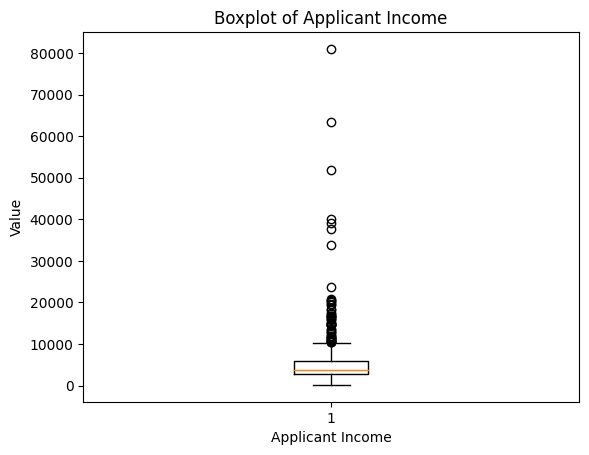

In [253]:
plt.boxplot(data['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Value')
plt.title('Boxplot of Applicant Income')
plt.show()

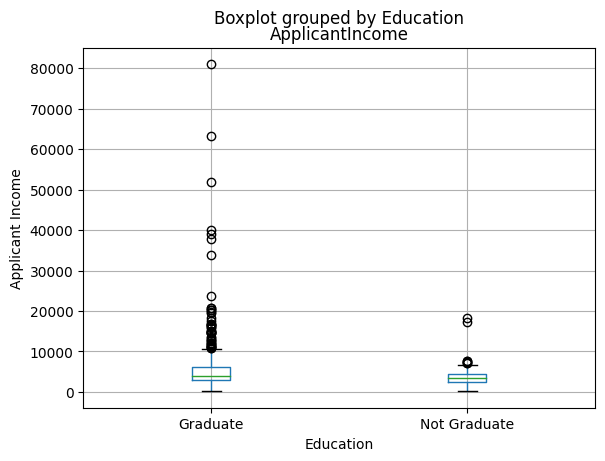

In [254]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()


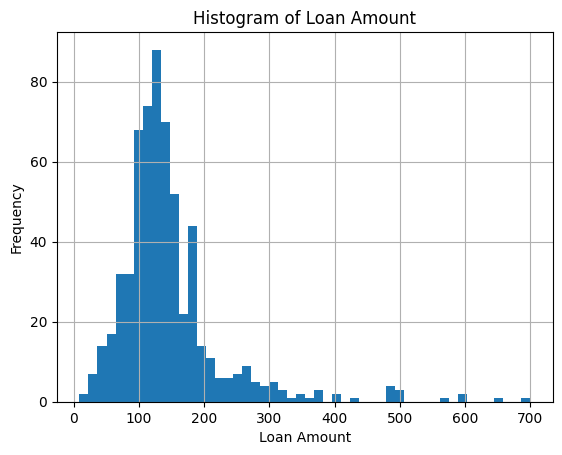

In [255]:
data['LoanAmount'].hist(bins=50)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

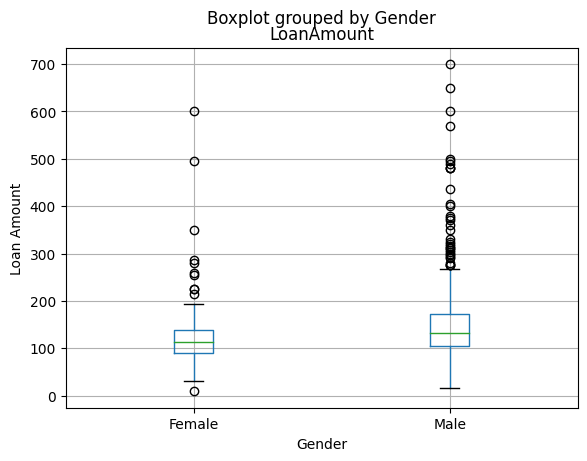

In [256]:
data.boxplot(column='LoanAmount', by='Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

In [257]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [258]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder()
data[["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]]=ord_enc.fit_transform(data[["Loan_ID","Dependents","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,0.0,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,0.0,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,0.0,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [259]:
data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].astype('int')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0,1,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2.0,0,1,1.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3.0,0,1,1.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4.0,0,1,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610.0,3,1,1.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611.0,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612.0,2,1,1.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [260]:
from sklearn.model_selection import train_test_split
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [262]:
print(x_train.shape)

(491, 12)


In [263]:
print(y_train.shape)

(491,)


In [264]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [265]:
y_pred_lr = logit_model.predict(x_test)

In [266]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('Precision = ',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_lr,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.7560975609756098
Precision =  0.7597114317425083
Recall =  0.6428571428571428
f1 score =  0.6531954887218046
Confusion matrix =
  [[13 26]
 [ 4 80]]


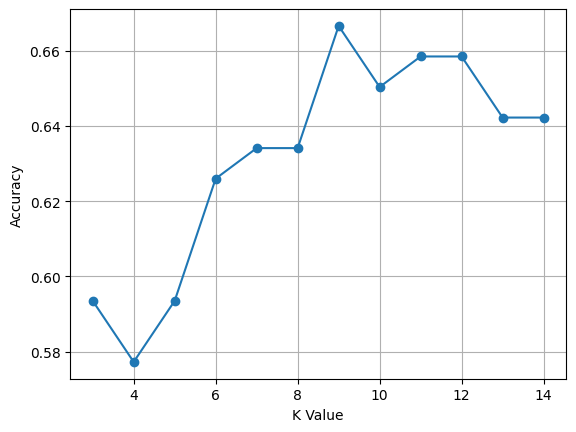

In [267]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

plt.plot(neighbors,metric,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [268]:
Classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

In [269]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_knn,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.6504065040650406
Precision =  0.5332943925233644
Recall =  0.5173992673992673
f1 score =  0.4965254640647311
Confusion matrix =
  [[ 6 33]
 [10 74]]


In [270]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [272]:
y_pred_svm=svmclf.predict(x_test)

In [273]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix =\n ',cm)

Accuracy =  0.7642276422764228
Precision =  0.758495145631068
Recall =  0.6625457875457875
f1 score =  0.6766971811837217
Confusion matrix =
  [[15 24]
 [ 5 79]]


In [274]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [275]:
y_pred_dt = dt_clf.predict(x_test)

In [276]:
print('Accracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_dt))

Accracy is:  0.6910569105691057
Precision =  0.6353535353535353
Recall =  0.6227106227106227
f1 score =  0.6269157088122606
Confusion matrix =
  [[17 22]
 [16 68]]


In [277]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [278]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision = ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.7479674796747967
Precision =  0.7135210150674068
Recall =  0.6643772893772895
f1 score =  0.6759031024224395
Confusion matrix =
  [[17 22]
 [ 9 75]]


In [296]:
dtest=pd.read_csv('test_lAUu6dG (1).csv')

In [297]:
dtest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [298]:
dtest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [299]:
dtest['Dependents']=dtest['Dependents'].fillna(dtest['Dependents'].ffill())


In [300]:
dtest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [301]:
cols=dtest[["Gender","Married","Self_Employed"]]
for i in cols:
    dtest[i].fillna(dtest[i].mode().iloc[0], inplace=True)
dtest.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [302]:
n_cols =dtest[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for i in n_cols:
    dtest[i].fillna(dtest[i].mean(), inplace=True)

dtest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [304]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder()
dtest[["Loan_ID","Gender","Dependents","Married","Education","Self_Employed","Property_Area"]]=ord_enc.fit_transform(dtest[["Loan_ID","Gender","Dependents","Married","Education","Self_Employed","Property_Area"]])
dtest[["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area"]]=dtest[["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area"]].astype('int')
y_pred_svm1=svmclf.predict(dtest)

In [305]:
y_pred_svm1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [306]:
data2 = pd.read_csv("sample_submission_49d68Cx (1).csv")

In [307]:
data2.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [308]:
data2['Loan_Status'] = y_pred_svm1

In [309]:
data2.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [310]:
data2["Loan_Status"] = data2["Loan_Status"].replace({1 : "Y", 0 : "N"})

In [311]:
data2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [312]:
data2.to_csv("sample_submission_2.csv", index=False)
